In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import spectral_clustering
from rdkit.Chem import Crippen as logp
from rdkit.Chem import rdMolDescriptors as tpsa
from rdkit.Chem import QED as QED
import matplotlib as mpl
from matplotlib import rc, rcParams

In [2]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
# data reading
data = pd.read_csv ('Features_hc_qm9.csv')

gen_data = pd.read_csv ('FeaturesRegular_NODUP_noscreen.csv')
"""for c in data.columns[:-1]:
    print('Variance of column {}: {}'.format(c, np.var(data[c])))
"""

data.drop('NumRadicalElectrons', axis = 1, inplace = True)
data.drop('NumAromaticCarbocycles', axis = 1, inplace = True)

gen_data.drop('NumRadicalElectrons', axis = 1, inplace = True)
gen_data.drop('NumAromaticCarbocycles', axis = 1, inplace = True)

In [4]:
gen_data

,MolWt,HeavyAtomCount,HeavyAtomMolWt,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAromaticHeterocycles,NumSaturatedCarbocycles,NumSaturatedHeterocycles,Logp,TPSA,QED,heat_capacity
0,98.065,7,96.049,5,0,5,1,36,1,0,0,0,0,1,0,0,-1.28860,60.67,0.409914,20.963327
1,82.102,6,76.054,1,0,1,1,32,0,0,1,1,0,0,0,0,0.90550,17.07,0.429467,20.984020
2,82.106,6,76.058,2,2,2,0,32,0,0,1,0,1,0,0,0,0.12307,35.88,0.427607,20.989391
3,81.078,6,78.054,3,1,3,0,30,0,0,1,0,1,0,0,0,-0.53242,48.18,0.425709,20.998030
4,112.048,8,112.048,5,0,6,0,40,1,0,0,0,0,1,0,0,-1.42532,89.65,0.303017,20.998405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,131.219,9,114.083,2,2,2,4,56,0,0,0,0,0,0,0,0,0.47030,32.26,0.581043,42.193939
7101,128.259,9,108.099,0,0,0,4,56,0,0,0,0,0,0,0,0,3.46870,0.00,0.543557,42.206387
7102,131.219,9,114.083,2,2,2,3,56,0,0,0,0,0,0,0,0,0.74220,46.25,0.593183,42.206398
7103,130.231,9,112.087,1,1,1,4,56,0,0,0,0,0,0,0,0,2.05100,20.23,0.617204,42.206577


(array([0.04769144, 0.04665515, 0.04687128, 0.0477524 , 0.04778011,
        0.04719269, 0.04758615, 0.04672165, 0.04762494, 0.04369591]),
 array([20.93899918, 23.06859932, 25.19819946, 27.32779961, 29.45739975,
        31.58699989, 33.71660004, 35.84620018, 37.97580032, 40.10540047,
        42.23500061]),
 <BarContainer object of 10 artists>)

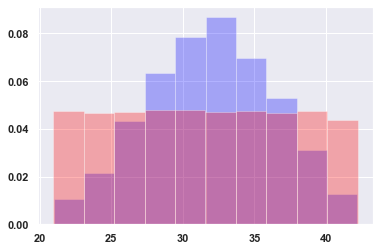

In [5]:
plt.hist(gen_data['heat_capacity'], density=True, color='blue', alpha=0.3)
plt.hist(data['heat_capacity'], density=True, color='red', alpha=0.3)

C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


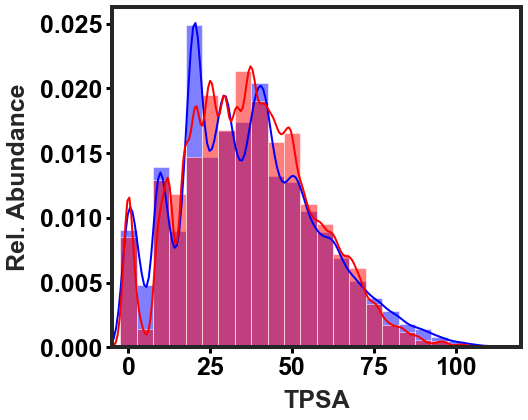

In [6]:
# plot Molw distribution
#data = data.loc [data['TPSA']>75]
sns.set_style("white")
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['TPSA']), min(data['TPSA'])))
max_val = int(max(max(gen_data['TPSA']), max(data['TPSA'])))

bins = list(range(min_val, max_val, 5))
bins = [b-2.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':4}, kde_kws={'linewidth':2, 'bw_adjust':0.9})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.45})



sns.distplot(data['TPSA'], color='blue', **kwargs1, bins=bins)
sns.distplot(gen_data['TPSA'], color='red', **kwargs2, bins=bins)

#sns.histplot(data['TPSA'], color='blue', stat='proportion', bins=bins, kde=True)
#sns.histplot(gen_data['TPSA'], color='red', stat='proportion', bins=bins, kde=True)

ax.set_xlabel("TPSA", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

#plt.xlim(75, 145)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.05, 0.09, 0.13])
plt.xlim(-5, 120)
"""
plt.plot([np.mean(data['TPSA']), np.mean(data['TPSA'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['TPSA']), np.mean(gen_data['TPSA'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('TPSA.jpeg', dpi=500, bbox_inches='tight')

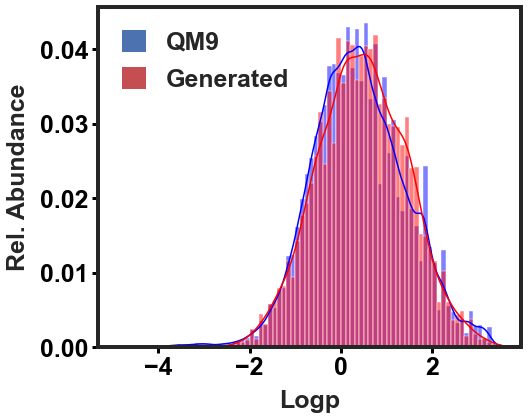

In [7]:
# plot Molw distribution
#data = data.loc [data['Logp']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = (min(min(gen_data['Logp']), min(data['Logp'])))
max_val = (max(max(gen_data['Logp']), max(data['Logp'])))

bins = list(np.arange(min_val, max_val, 0.1))
bins = [b for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.9})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.5})

sns.set_style("white")
#sns.distplot(data['Logp'], color='blue', **kwargs1, bins=bins)
#sns.distplot(gen_data['Logp'], color='red', **kwargs2, bins=bins)

sns.histplot(data['Logp'], color='blue', stat='proportion', bins=bins, kde=True)
sns.histplot(gen_data['Logp'], color='red', stat='proportion', bins=bins, kde=True)

ax.set_xlabel("Logp", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

#plt.xlim(75, 145)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.04, 0.07, 0.1])

"""
plt.plot([np.mean(data['Logp']), np.mean(data['Logp'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['Logp']), np.mean(gen_data['Logp'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], fontsize=25,
           handlelength=1, handleheight=1, frameon=False)

plt.tight_layout()
plt.savefig('Logp.jpeg', dpi=500, bbox_inches='tight')

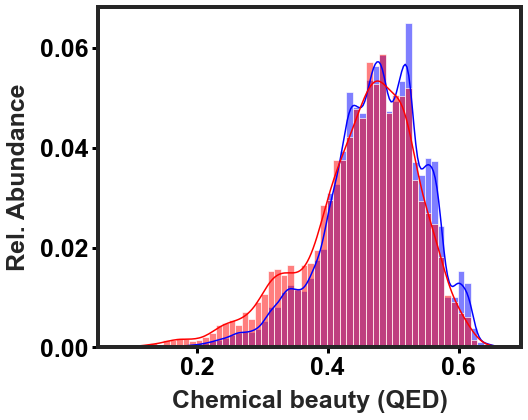

In [8]:
# plot Molw distribution
#data = data.loc [data['QED']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = (min(min(gen_data['QED']), min(data['QED'])))
max_val = (max(max(gen_data['QED']), max(data['QED'])))

bins = list(np.arange(min_val, max_val, 0.01))
bins = [b for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.9})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.5})

sns.set_style("white")
#sns.distplot(data['QED'], color='blue', **kwargs1, bins=bins)
#sns.distplot(gen_data['QED'], color='red', **kwargs2, bins=bins)

sns.histplot(data['QED'], color='blue', stat='proportion', bins=bins, kde=True)
sns.histplot(gen_data['QED'], color='red', stat='proportion', bins=bins, kde=True)

ax.set_xlabel("Chemical beauty (QED)", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

#plt.xlim(75, 145)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.04, 0.07, 0.1])

"""
plt.plot([np.mean(data['QED']), np.mean(data['QED'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['QED']), np.mean(gen_data['QED'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('QED.jpeg', dpi=500, bbox_inches='tight')

C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


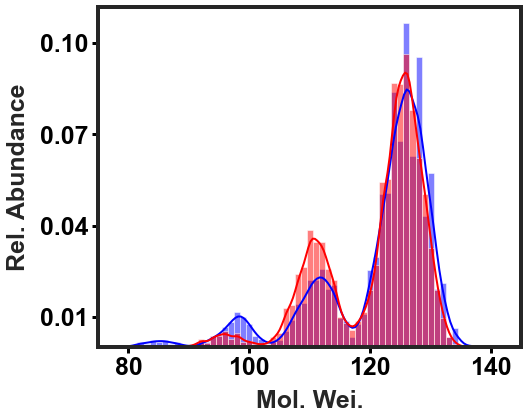

In [9]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['MolWt']), min(data['MolWt'])))
max_val = int(max(max(gen_data['MolWt']), max(data['MolWt'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.9})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.5})

sns.set_style("white")
sns.distplot(data['MolWt'], bins=bins, color='blue', **kwargs1)
sns.distplot(gen_data['MolWt'], bins=bins, color='red', **kwargs2)

ax.set_xlabel("Mol. Wei.", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(75, 145)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
plt.yticks([0.01, 0.04, 0.07, 0.1])

"""
plt.plot([np.mean(data['MolWt']), np.mean(data['MolWt'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['MolWt']), np.mean(gen_data['MolWt'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('MolWt.jpeg', dpi=500, bbox_inches='tight')


C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


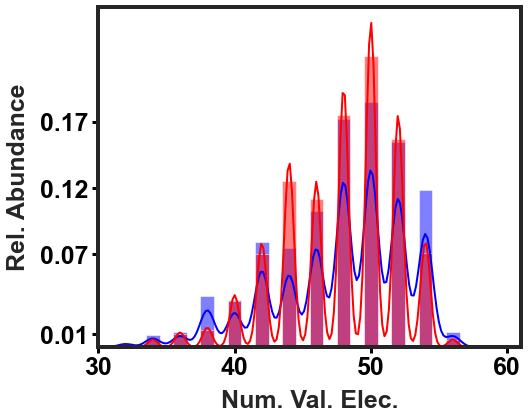

In [10]:
# plot Molw distribution
#data = data.loc [data['NumValenceElectrons']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumValenceElectrons']), min(data['NumValenceElectrons'])))
max_val = int(max(max(gen_data['NumValenceElectrons']), max(data['NumValenceElectrons'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':1.1})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':2, 'bw_adjust':0.5})

"""
sns.histplot(data['NumValenceElectrons'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumValenceElectrons'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.distplot(data['NumValenceElectrons'], bins=bins, color='blue', **kwargs1)
sns.distplot(gen_data['NumValenceElectrons'], bins=bins, color='red', **kwargs2)

ax.set_xlabel("Num. Val. Elec.", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(30, 61)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
plt.yticks([0.01, 0.07, 0.12, 0.17])

"""
plt.plot([np.mean(data['NumValenceElectrons']), np.mean(data['NumValenceElectrons'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['NumValenceElectrons']), np.mean(gen_data['NumValenceElectrons'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumValenceElectrons.jpeg', dpi=500, bbox_inches='tight')


C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


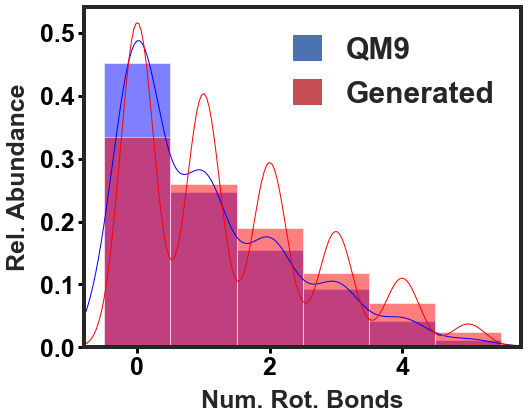

In [11]:
# plot Molw distribution
#data = data.loc [data['NumRotatableBonds']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumRotatableBonds']), min(data['NumRotatableBonds'])))
max_val = int(max(max(gen_data['NumRotatableBonds']), max(data['NumRotatableBonds'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':2.9})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':1.1})

"""
sns.histplot(data['NumRotatableBonds'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumRotatableBonds'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.distplot(data['NumRotatableBonds'], bins=bins, color='blue', **kwargs1)
sns.distplot(gen_data['NumRotatableBonds'], bins=bins, color='red', **kwargs2)

ax.set_xlabel("Num. Rot. Bonds", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(-0.8, 5.8)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.07, 0.12, 0.17])

"""
plt.plot([np.mean(data['NumRotatableBonds']), np.mean(data['NumRotatableBonds'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['NumRotatableBonds']), np.mean(gen_data['NumRotatableBonds'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], fontsize=30,
           handlelength=1, handleheight=1, frameon=False)


#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumRotatableBonds.jpeg', dpi=500, bbox_inches='tight')


C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


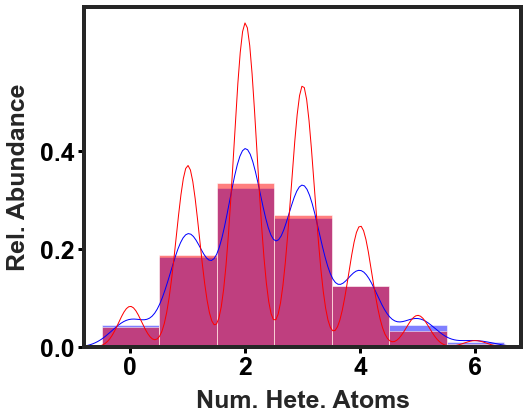

In [12]:
# plot Molw distribution
#data = data.loc [data['NumHeteroatoms']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumHeteroatoms']), min(data['NumHeteroatoms'])))
max_val = int(max(max(gen_data['NumHeteroatoms']), max(data['NumHeteroatoms'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':2.5})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':1.0})

"""
sns.histplot(data['NumHeteroatoms'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumHeteroatoms'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.distplot(data['NumHeteroatoms'], bins=bins, color='blue', **kwargs1)
sns.distplot(gen_data['NumHeteroatoms'], bins=bins, color='red', **kwargs2)

ax.set_xlabel("Num. Hete. Atoms", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(-0.8, 6.8)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
plt.yticks([0, 0.2, 0.4])

"""
plt.plot([np.mean(data['NumHeteroatoms']), np.mean(data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['NumHeteroatoms']), np.mean(gen_data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumHeteroatoms.jpeg', dpi=500, bbox_inches='tight')

C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


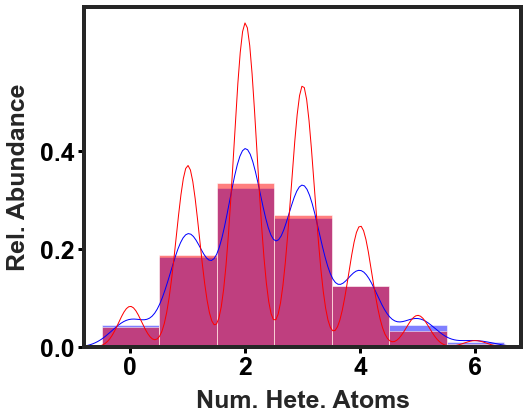

In [13]:
# plot Molw distribution
#data = data.loc [data['NumHeteroatoms']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumHeteroatoms']), min(data['NumHeteroatoms'])))
max_val = int(max(max(gen_data['NumHeteroatoms']), max(data['NumHeteroatoms'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':2.5})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':1.0})

"""
sns.histplot(data['NumHeteroatoms'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumHeteroatoms'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.distplot(data['NumHeteroatoms'], bins=bins, color='blue', **kwargs1)
sns.distplot(gen_data['NumHeteroatoms'], bins=bins, color='red', **kwargs2)

ax.set_xlabel("Num. Hete. Atoms", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(-0.8, 6.8)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
plt.yticks([0, 0.2, 0.4])

"""
plt.plot([np.mean(data['NumHeteroatoms']), np.mean(data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['NumHeteroatoms']), np.mean(gen_data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumHeteroatoms.jpeg', dpi=500, bbox_inches='tight')

C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatemeh\Anaconda3\envs\rdkit_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


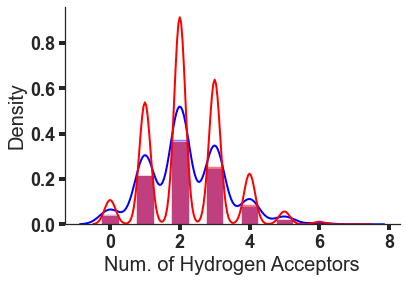

In [14]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

kwargs = dict(hist_kws={'alpha':0.5, 'rwidth':0.5}, kde_kws={'linewidth':2, 'bw_adjust':2.5})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':0.5}, kde_kws={'linewidth':2, 'bw_adjust':0.85})

sns.set_style("white")
sns.distplot(np.array(data['NumHAcceptors']), 
             color='blue', bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5],**kwargs)
sns.distplot(np.array(gen_data['NumHAcceptors']), 
             color='red', bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5], **kwargs2)


plt.xlabel("Num. of Hydrogen Acceptors", fontsize=20)
plt.ylabel("Density", fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc.jpeg', dpi=500, bbox_inches='tight')


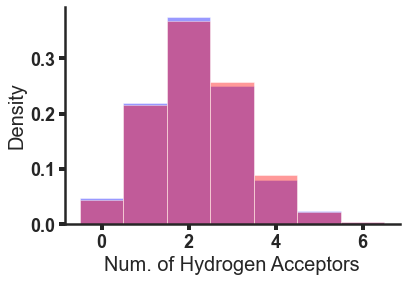

In [15]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

#sns.set_style("white")
#sns.distplot(data['NumHAcceptors'], color='blue')
#sns.distplot(gen_data['NumHAcceptors'], color='red')
#histtype='barstacked'
qm9_hist = plt.hist(data['NumHAcceptors'], color='blue', histtype='bar',
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5], alpha=0.4)
gen_hist = plt.hist(gen_data['NumHAcceptors'], color='red', histtype='bar', 
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5], alpha=0.4)

plt.xlabel("Num. of Hydrogen Acceptors", fontsize=20)
plt.ylabel("Density", fontsize=20)
#xlim(70, 170)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc_plthist.jpeg', dpi=500, bbox_inches='tight')

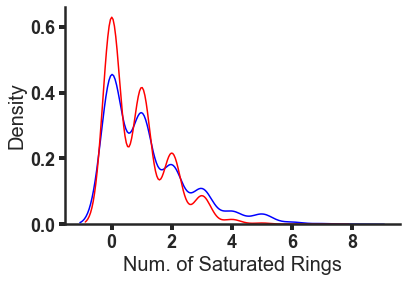

In [16]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]
plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

sns.set_style("white")
sns.kdeplot(np.array(data['NumSaturatedRings']), color='blue', bw_adjust=2.5)
sns.kdeplot(np.array(gen_data['NumSaturatedRings']), color='red', bw_adjust=1.7)


plt.xlabel("Num. of Saturated Rings", fontsize=20)
plt.ylabel("Density", fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc.jpeg', dpi=500, bbox_inches='tight')

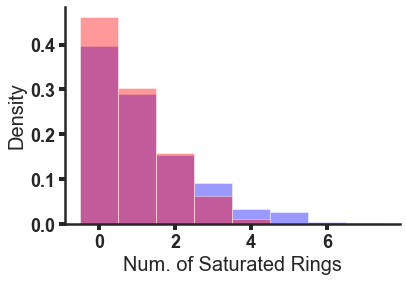

In [17]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

#sns.set_style("white")
#sns.distplot(data['NumHAcceptors'], color='blue')
#sns.distplot(gen_data['NumHAcceptors'], color='red')
#histtype='barstacked'
qm9_hist = plt.hist(data['NumSaturatedRings'], color='blue', histtype='bar',
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5, 7.5], alpha=0.4)
gen_hist = plt.hist(gen_data['NumSaturatedRings'], color='red', histtype='bar', 
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5, 7.5], alpha=0.4)

plt.xlabel("Num. of Saturated Rings", fontsize=20)
plt.ylabel("Density", fontsize=20)
#xlim(70, 170)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc_plthist.jpeg', dpi=500, bbox_inches='tight')